In [12]:
import seaborn as sns
import pandas as pd

In [13]:
# Read dataset
df = pd.read_csv("merged_datasets/dataset_for_correlation_2018-2023.csv")
df.head()

,Year,State,Male_High_school_graduate_(includes_equivalency),Male_Bachelor_degree,Male_Graduate_or_professional_degree,Male_18-24_Less_than_9th_grade,"Male_18-24_9th_to_12th_grade,_no_diploma",Male_18-24_High_school_graduate_(includes_equivalency),"Male_18-24_Some_college,_no_degree",Male_18-24_Associate_degree,...,Male_Graduate_or_professional_degree_Normalized,Female_High_school_graduate_(includes_equivalency)_Normalized,Female_Bachelor_degree_Normalized,Female_Graduate_or_professional_degree_Normalized,Male_High_school_graduate_(includes_equivalency)_Normalized_Average,Male_Bachelor_degree_Normalized_Average,Male_Graduate_or_professional_degree_Normalized_Average,Female_High_school_graduate_(includes_equivalency)_Normalized_Average,Female_Bachelor_degree_Normalized_Average,Female_Graduate_or_professional_degree_Normalized_Average
0,2018,Alabama,603703,264142,141603,3553,30855,92087,78026,14302,...,7.8,29.3,15.4,8.9,33.22,15.28,8.74,29.60,16.24,9.96
1,2018,Alaska,95887,43681,27730,358,4159,18021,12595,992,...,9.6,27.5,18.8,11.1,33.92,15.40,9.16,27.50,20.22,11.70
2,2018,Arizona,708440,463148,269575,7116,53104,125103,130173,14414,...,9.9,24.3,17.5,9.8,26.20,17.98,10.54,24.02,18.72,11.00
3,2018,Arkansas,414645,141664,83126,2060,16870,61540,53055,7056,...,7.4,31.9,14.8,7.8,37.32,13.74,7.44,32.24,15.76,8.62
4,2018,California,3483509,2896574,1737855,25665,202335,643676,788192,88991,...,11.5,20.8,20.7,11.4,23.48,19.96,12.16,20.80,21.64,12.46


In [14]:
# Select normalized data (average) for males
df_males = df[["State", "Male_High_school_graduate_(includes_equivalency)_Normalized_Average", "Male_Bachelor_degree_Normalized_Average", "Male_Graduate_or_professional_degree_Normalized_Average"]]
df_males.head()

,State,Male_High_school_graduate_(includes_equivalency)_Normalized_Average,Male_Bachelor_degree_Normalized_Average,Male_Graduate_or_professional_degree_Normalized_Average
0,Alabama,33.22,15.28,8.74
1,Alaska,33.92,15.40,9.16
2,Arizona,26.20,17.98,10.54
3,Arkansas,37.32,13.74,7.44
4,California,23.48,19.96,12.16


In [15]:
# Select normalized data for females
df_females = df[["State", "Female_High_school_graduate_(includes_equivalency)_Normalized_Average", "Female_Bachelor_degree_Normalized_Average", "Female_Graduate_or_professional_degree_Normalized_Average"]]
df_females.head()

,State,Female_High_school_graduate_(includes_equivalency)_Normalized_Average,Female_Bachelor_degree_Normalized_Average,Female_Graduate_or_professional_degree_Normalized_Average
0,Alabama,29.60,16.24,9.96
1,Alaska,27.50,20.22,11.70
2,Arizona,24.02,18.72,11.00
3,Arkansas,32.24,15.76,8.62
4,California,20.80,21.64,12.46


In [16]:
# Set theme
sns.set_theme(style = "whitegrid")

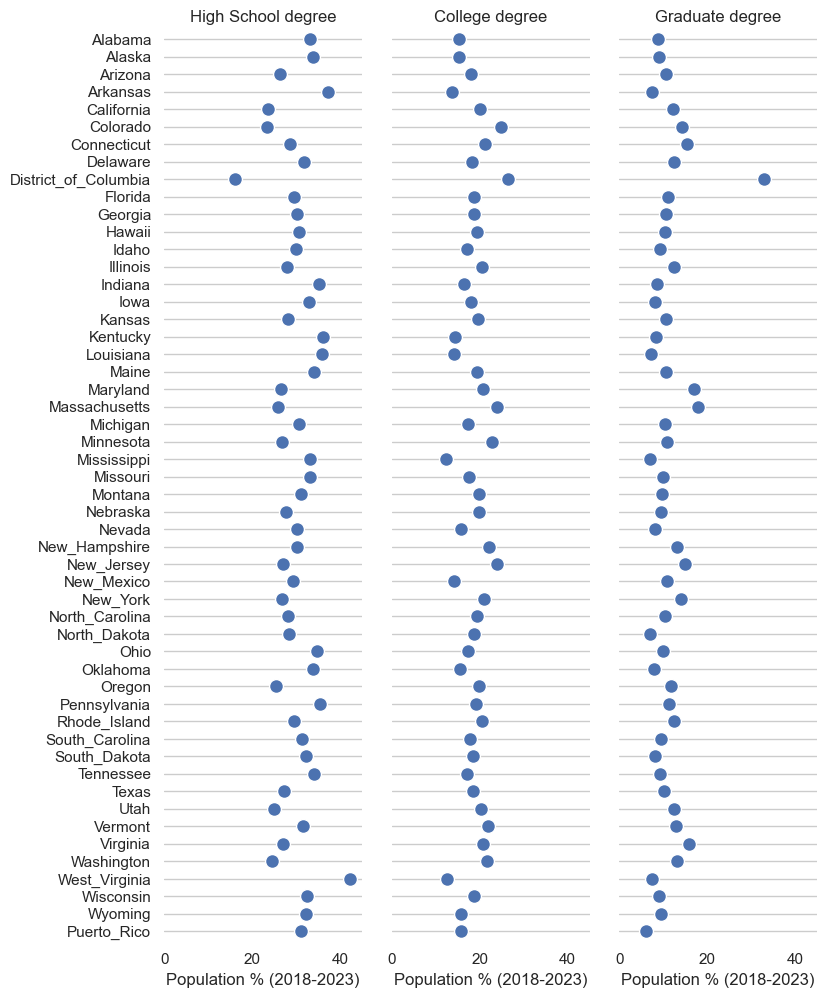

In [17]:
# Make the PairGrid for male data. Modified from https://seaborn.pydata.org/examples/pairgrid_dotplot.html
g = sns.PairGrid(df_males, x_vars = df_males.columns[1:], y_vars = ["State"], height = 10, aspect = .25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size = 10, orient = "h", jitter = False,
      palette = "flare_r", linewidth = 1, edgecolor = "w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim = (0, 45), xlabel = "Population % (2018-2023)", ylabel = "")

# Use semantically meaningful titles for the columns
titles = ["High School degree", "College degree", "Graduate degree"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title = title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left = True, bottom = True)

In [18]:
# Save figure
g.savefig("outputs/pairgrid_males.png", dpi = 300)

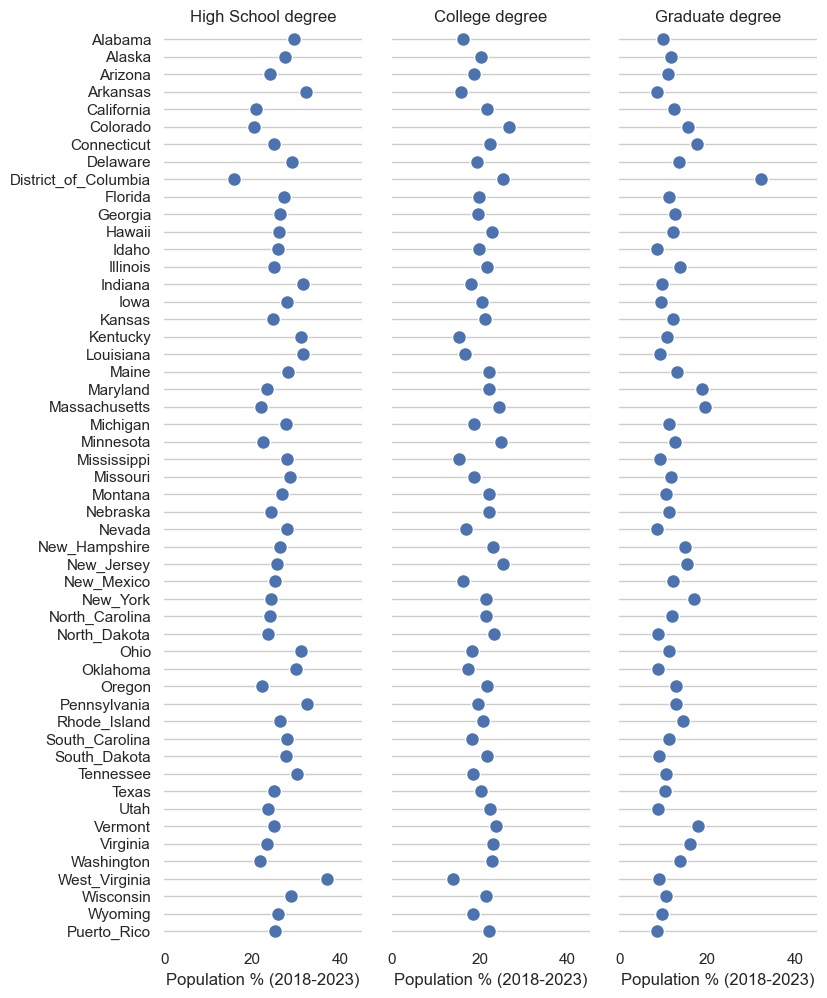

In [19]:
# Make the PairGrid for female data. Modified from https://seaborn.pydata.org/examples/pairgrid_dotplot.html
g_females = sns.PairGrid(df_females,x_vars = df_females.columns[1:], y_vars = ["State"], height = 10, aspect = .25)

# Draw a dot plot using the stripplot function
g_females.map(sns.stripplot, size = 10, orient = "h", jitter = False,
      palette = "flare_r", linewidth = 1, edgecolor = "w")

# Use the same x axis limits on all columns and add better labels
g_females.set(xlim = (0, 45), xlabel = "Population % (2018-2023)", ylabel = "")

# Use semantically meaningful titles for the columns
titles = ["High School degree", "College degree", "Graduate degree"]

for ax, title in zip(g_females.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title = title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left = True, bottom = True)

In [20]:
# Save figure
g_females.savefig("outputs/pairgrid_females.png", dpi = 300)